# Oracle: Median Following

Keeps the car on the track median with variable look ahead time.

In [50]:
from DriveItGym import *
import numpy as np
from numpy import pi

num_episodes = 1  # number of episodes to run
time_limit = 10.0
throttle_limit = 1.0
gamma = 0.98
epsilon = 0.02
look_ahead = 0.34 # [-0.03, 0.37], 0.16 for the median, 0.34 optimal
kp = np.array((0.15, 1.0, 0.3)) * 3.0 # lateral, heading, steer
kb = 0.0
trl = 2.3 + (0.35 - look_ahead) * (3.1 - 2.3) / (0.34 - 0.00)
random_position=False

env = DriveItEnv(time_limit, throttle_limit, gamma, \
                 show_true_median_pos=False, trail_length=trl)
observation = env._reset(random_position)
done = False
reward_episode = 0
reward_sum = 0.0

for i_episode in range(1, num_episodes + 1):
    trace = []
    while not done:
        if num_episodes < 2:
            env.render()

        _, _, _, b_rl = observation
        err = env.median_error(look_ahead)
        trace.append(err)
        
        f = np.inner(kp, err) + kb * b_rl
        if f < -epsilon: action = 1
        elif f > epsilon: action = 2
        else: action = 0

        observation, reward, done, info = env.step(action)
        reward_episode += reward

    if num_episodes <= 10 or info['done'] != 'complete':
        print('Episode %d %s. reward: %f, laps: %f' % \
              (i_episode, info['done'], reward_episode, \
               reward_episode / lap_median_length))
    reward_sum += reward_episode
    reward_episode = 0
    observation = env._reset(random_position)
    done = False

print('Average reward: %f' %(reward_sum / num_episodes))

Episode 1 complete. reward: 22.743749, laps: 4.517765
Average reward: 22.743749


In [51]:
env.close()

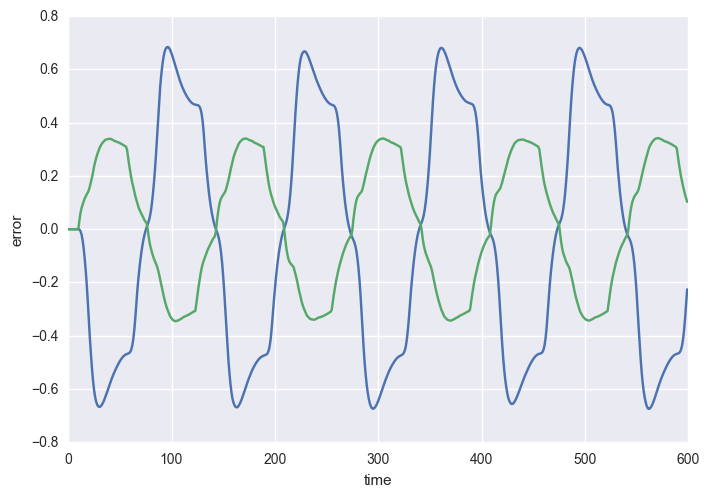

In [52]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('ggplot')
%matplotlib inline
sns.set()
plt.plot([t[0] for t in trace])
plt.plot([t[1] for t in trace])
#plt.plot(trace)
plt.xlabel('time');plt.ylabel('error')

In [2]:
env._reset(random_position)

array([-0.00023755,  0.00459895,  0.        ,  0.        ])

In [3]:
env.render()